In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# read the csv file
try:
    df = pd.read_csv('IMDB.csv', delimiter=';')
except FileNotFoundError as fnfe:
    print(f"The requested file was not found - {fnfe}")

# Step 1 - Understanding the data

In [64]:
# shape of csv
# shows no.rows and no.column
df.shape

(101, 12)

In [65]:
# display first 5 rows of dataset
df.head()

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


In [66]:
# display all columns
df.columns

Index(['IMBD title ID', 'Original title', 'Release year', 'Genre', 'Duration',
       'Country', 'Content Rating', 'Director', 'Unnamed: 8', 'Income',
       ' Votes ', 'Score'],
      dtype='object')

In [67]:
# list data type for each column
df.dtypes

IMBD title ID      object
Original title     object
Release year       object
Genre              object
Duration           object
Country            object
Content Rating     object
Director           object
Unnamed: 8        float64
Income             object
 Votes             object
Score              object
dtype: object

# Step 2 - Transform the data

In [68]:
df

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"
...,...,...,...,...,...,...,...,...,...,...,...,...
96,tt0070735,The Sting,1974-03-21,"Comedy, Crime, Drama",129,USA,PG,George Roy Hill,NaN,$ 156000000,236.285,7.5
97,tt0082096,Das Boot,1982-03-18,"Adventure, Drama, Thriller",149,West Germany,R,Wolfgang Petersen,NaN,$ 11487676,226.427,7.5
98,tt0059578,Per qualche dollaro in più,1965-12-20,Western,132,Italy,NaN,Sergio Leone,NaN,$ 15000000,226.039,7.4
99,tt1832382,Jodaeiye Nader az Simin,2011-10-21,Drama,123,Iran,PG-13,Asghar Farhadi,NaN,$ 22926076,214.165,7.4


In [69]:
# Check for duplicates in the specified column
duplicated_values = df['Original title'].duplicated(keep=False)

# Shows rows where 'Original title' has duplicated values
df[duplicated_values]

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score


In [70]:
# check how many null values in each column
df.isna().sum()

IMBD title ID       1
Original title      1
Release year        1
Genre               1
Duration            2
Country             1
Content Rating     24
Director            1
Unnamed: 8        101
Income              1
 Votes              1
Score               1
dtype: int64

In [71]:
# drop columns which only have null values
df = df.dropna(axis=1, how='all')
# Show all columns after dropping empty columns
df.columns

Index(['IMBD title ID', 'Original title', 'Release year', 'Genre', 'Duration',
       'Country', 'Content Rating', 'Director', 'Income', ' Votes ', 'Score'],
      dtype='object')

In [72]:
# drop rows which only have null values
df = df.dropna(axis=0, how='all')
df.isna().sum()

IMBD title ID      0
Original title     0
Release year       0
Genre              0
Duration           1
Country            0
Content Rating    23
Director           0
Income             0
 Votes             0
Score              0
dtype: int64

In [74]:
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df.loc[9,'Duration'] = np.nan

null_duration_rows = df[df['Duration'].isna()]
# Display the row number(s) where 'Duration' is null
print(null_duration_rows.index)

Index([4, 6, 9, 11, 14, 16, 18], dtype='int64')


In [75]:
df.loc[4]

IMBD title ID             tt0110912
Original title         Pulp Fiction
Release year             1994-10-28
Genre                  Crime, Drama
Duration                        NaN
Country                         USA
Content Rating                    R
Director          Quentin Tarantino
Income                  $ 222831817
 Votes                    1.780.147
Score                          8,9f
Name: 4, dtype: object

In [76]:
df.loc[4,'Duration'] = 154
df.loc[4]

IMBD title ID             tt0110912
Original title         Pulp Fiction
Release year             1994-10-28
Genre                  Crime, Drama
Duration                      154.0
Country                         USA
Content Rating                    R
Director          Quentin Tarantino
Income                  $ 222831817
 Votes                    1.780.147
Score                          8,9f
Name: 4, dtype: object

In [77]:
df.loc[6]

IMBD title ID                     tt0108052
Original title             Schindler's List
Release year                     1994-03-11
Genre             Biography, Drama, History
Duration                                NaN
Country                                 USA
Content Rating                            R
Director                   Steven Spielberg
Income                          $ 322287794
 Votes                            1.183.248
Score                                   8.9
Name: 6, dtype: object

In [78]:
df.loc[6,'Duration'] = 195
df.loc[6]

IMBD title ID                     tt0108052
Original title             Schindler's List
Release year                     1994-03-11
Genre             Biography, Drama, History
Duration                              195.0
Country                                 USA
Content Rating                            R
Director                   Steven Spielberg
Income                          $ 322287794
 Votes                            1.183.248
Score                                   8.9
Name: 6, dtype: object

In [79]:
df.loc[9]

IMBD title ID         tt0137523
Original title       Fight Club
Release year           10-29-99
Genre                     Drama
Duration                    NaN
Country                      UK
Content Rating                R
Director          David Fincher
Income              $ 101218804
 Votes                1.807.440
Score                       8.8
Name: 9, dtype: object

In [80]:
df.loc[9,'Duration'] = 139
df.loc[9]

IMBD title ID         tt0137523
Original title       Fight Club
Release year           10-29-99
Genre                     Drama
Duration                  139.0
Country                      UK
Content Rating                R
Director          David Fincher
Income              $ 101218804
 Votes                1.807.440
Score                       8.8
Name: 9, dtype: object

In [81]:
df.loc[11]

IMBD title ID                                             tt0120737
Original title    The Lord of the Rings: The Fellowship of the Ring
Release year                                             2002-01-18
Genre                                      Action, Adventure, Drama
Duration                                                        NaN
Country                                                 New Zesland
Content Rating                                                PG-13
Director                                              Peter Jackson
Income                                                  $ 887934303
 Votes                                                    1.619.920
Score                                                           8.8
Name: 11, dtype: object

In [82]:
df.loc[11,'Duration'] = 178
df.loc[11]

IMBD title ID                                             tt0120737
Original title    The Lord of the Rings: The Fellowship of the Ring
Release year                                             2002-01-18
Genre                                      Action, Adventure, Drama
Duration                                                      178.0
Country                                                 New Zesland
Content Rating                                                PG-13
Director                                              Peter Jackson
Income                                                  $ 887934303
 Votes                                                    1.619.920
Score                                                           8.8
Name: 11, dtype: object

In [83]:
# get data on row 14
df.loc[14]

IMBD title ID                           tt0133093
Original title                         The Matrix
Release year                           1999-05-07
Genre                              Action, Sci-Fi
Duration                                      NaN
Country                                       USA
Content Rating                                  R
Director          Lana Wachowski, Lilly Wachowski
Income                                $ 465718588
 Votes                                  1.632.315
Score                                       ++8.7
Name: 14, dtype: object

In [84]:
# manually insert duration value (acccessed imdb website)
df.loc[14,'Duration'] = 136
df.loc[14]

IMBD title ID                           tt0133093
Original title                         The Matrix
Release year                           1999-05-07
Genre                              Action, Sci-Fi
Duration                                    136.0
Country                                       USA
Content Rating                                  R
Director          Lana Wachowski, Lilly Wachowski
Income                                $ 465718588
 Votes                                  1.632.315
Score                                       ++8.7
Name: 14, dtype: object

In [85]:
df.loc[16]

IMBD title ID                                          tt0080684
Original title    Star Wars: Episode V - The Empire Strikes Back
Release year                                          1980-09-19
Genre                                 Action, Adventure, Fantasy
Duration                                                     NaN
Country                                                      USA
Content Rating                                                PG
Director                                          Irvin Kershner
Income                                               $ 549265501
 Votes                                                 1.132.073
Score                                                     8,7e-0
Name: 16, dtype: object

In [86]:
df.loc[16,'Duration'] = 124
df.loc[16]

IMBD title ID                                          tt0080684
Original title    Star Wars: Episode V - The Empire Strikes Back
Release year                                          1980-09-19
Genre                                 Action, Adventure, Fantasy
Duration                                                   124.0
Country                                                      USA
Content Rating                                                PG
Director                                          Irvin Kershner
Income                                               $ 549265501
 Votes                                                 1.132.073
Score                                                     8,7e-0
Name: 16, dtype: object

In [87]:
df.loc[18]

IMBD title ID                           tt0073486
Original title    One Flew Over the Cuckoo's Nest
Release year                           18/11/1976
Genre                                       Drama
Duration                                      NaN
Country                                       USA
Content Rating                                  R
Director                             Milos Forman
Income                                $ 108997629
 Votes                                    891.071
Score                                         8.7
Name: 18, dtype: object

In [88]:
df.loc[18,'Duration'] = 133
df.loc[18]

IMBD title ID                           tt0073486
Original title    One Flew Over the Cuckoo's Nest
Release year                           18/11/1976
Genre                                       Drama
Duration                                    133.0
Country                                       USA
Content Rating                                  R
Director                             Milos Forman
Income                                $ 108997629
 Votes                                    891.071
Score                                         8.7
Name: 18, dtype: object

In [89]:
# check to see if null values are gone
df.isna().sum()

IMBD title ID      0
Original title     0
Release year       0
Genre              0
Duration           0
Country            0
Content Rating    23
Director           0
Income             0
 Votes             0
Score              0
dtype: int64

In [90]:
df.head(10)

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142.0,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175.0,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152.0,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220.0,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",154.0,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"
5,tt0167260,The Lord of the Rings: The Return of the King,22 Feb 04,"Action, Adventure, Drama",201.0,New Zealand,PG-13,Peter Jackson,$ 1142271098,1.604.280,08.9
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",195.0,USA,R,Steven Spielberg,$ 322287794,1.183.248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",96.0,USA,Not Rated,Sidney Lumet,$ 576,668.473,8.9
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",148.0,USA,PG-13,Christopher Nolan,$ 869784991,2.002.816,8..8
9,tt0137523,Fight Club,10-29-99,Drama,139.0,UK,R,David Fincher,$ 101218804,1.807.440,8.8


In [91]:
df.loc[:,'Duration']

0      142.0
1      175.0
2      152.0
3      220.0
4      154.0
       ...  
96     129.0
97     149.0
98     132.0
99     123.0
100    103.0
Name: Duration, Length: 100, dtype: float64

In [92]:
df.isna().sum()

IMBD title ID      0
Original title     0
Release year       0
Genre              0
Duration           0
Country            0
Content Rating    23
Director           0
Income             0
 Votes             0
Score              0
dtype: int64

In [93]:
# strip whitespaces
df['Release year'] = df['Release year'].str.strip()
# replace gaps with -
df['Release year'] = df['Release year'].str.replace(' ', '-')
# replace / with -
df['Release year'] = df['Release year'].str.replace('/', '-')
# replace double dash with single dash
df['Release year'] = df['Release year'].str.replace('--', '-')
# replace words to digits
df['Release year'] = df['Release year'].str.replace('Feb', '02')


df.loc[:20,'Release year']

0                1995-02-10
1                09-21-1972
2                23-07-2008
3                1975-09-25
4                1994-10-28
5                  22-02-04
6                1994-03-11
7                1957-09-04
8                2010-09-24
9                  10-29-99
10               1994-10-06
11               2002-01-18
12    23rd-December-of-1966
14               1999-05-07
15                 01-16-03
16               1980-09-19
17               1990-09-20
18               18-11-1976
19               2014-11-06
20               1995-12-15
Name: Release year, dtype: object

In [94]:
# fix format to only digits
df.loc[12,'Release year'] = '1966-12-23'
print(df.loc[20,'Release year'])

df.loc[70,'Release year'] = '1951-03-06'
print(df.loc[70,'Release year'])

1995-12-15
1951-03-06


In [95]:
df.loc[:25,'Release year']

0     1995-02-10
1     09-21-1972
2     23-07-2008
3     1975-09-25
4     1994-10-28
5       22-02-04
6     1994-03-11
7     1957-09-04
8     2010-09-24
9       10-29-99
10    1994-10-06
11    2002-01-18
12    1966-12-23
14    1999-05-07
15      01-16-03
16    1980-09-19
17    1990-09-20
18    18-11-1976
19    2014-11-06
20    1995-12-15
21    1991-03-05
22    1977-10-20
23    1998-10-30
24    2000-10-03
25    2003-05-09
Name: Release year, dtype: object

In [96]:
# fix issues with year
df.loc[5,'Release year'] = '2004-02-22'
df.loc[9,'Release year'] = '1999-10-29'
df.loc[15,'Release year'] = '2003-01-16'
df.loc[45,'Release year'] = '1946-11-21'

In [97]:
df.loc[90:100,'Release year']

90     2020-01-23
91     1985-02-15
92     1958-11-18
93     1959-10-28
94     2012-11-22
95     1963-10-29
96     1974-03-21
97     1982-03-18
98     1965-12-20
99     2011-10-21
100    1953-02-05
Name: Release year, dtype: object

In [98]:
# fix ordering to YYYY-MM-DD
df.loc[1,'Release year'] = '1972-09-21'
df.loc[2,'Release year'] = '2008-07-23'
df.loc[18,'Release year'] = '1976-11-18'

In [99]:
# remove leading/trailing whitespaces
df['Genre'] = df['Genre'].str.strip()
df['Genre']

0                           Drama
1                    Crime, Drama
2            Action, Crime, Drama
3                    Crime, Drama
4                    Crime, Drama
                  ...            
96           Comedy, Crime, Drama
97     Adventure, Drama, Thriller
98                        Western
99                          Drama
100      Comedy, Musical, Romance
Name: Genre, Length: 100, dtype: object

In [100]:
# check data type
df['Duration'].dtype

dtype('float64')

In [101]:
# convert to int to remove decimal and trailing 0
df['Duration'] = df['Duration'].astype(int)
df['Duration']

0      142
1      175
2      152
3      220
4      154
      ... 
96     129
97     149
98     132
99     123
100    103
Name: Duration, Length: 100, dtype: int32

In [102]:
# rename duration column
df.rename(columns={'Duration': 'Duration (min)'}, inplace=True)
df.head()

,IMBD title ID,Original title,Release year,Genre,Duration (min),Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"


In [103]:
df.loc[:25,'Country']

0             USA
1             USA
2              US
3             USA
4             USA
5     New Zealand
6             USA
7             USA
8             USA
9              UK
10            USA
11    New Zesland
12          Italy
14            USA
15     New Zeland
16            USA
17            USA
18            USA
19            USA
20            USA
21            USA
22            USA
23            USA
24            US.
25         Brazil
Name: Country, dtype: object

In [104]:
df['Country'] = df['Country'].str.strip()

In [105]:
# clean issues with USA
df['Country'] = df['Country'].str.replace('US','USA')
df['Country'] = df['Country'].str.replace('USAA','USA')
df.loc[:25,'Country']


0             USA
1             USA
2             USA
3             USA
4             USA
5     New Zealand
6             USA
7             USA
8             USA
9              UK
10            USA
11    New Zesland
12          Italy
14            USA
15     New Zeland
16            USA
17            USA
18            USA
19            USA
20            USA
21            USA
22            USA
23            USA
24           USA.
25         Brazil
Name: Country, dtype: object

In [106]:
# 24
df.loc[24,'Country'] ='USA'

In [107]:
# clean issues with New Zealand
df.loc[11,'Country'] ='New Zealand'
df.loc[15,'Country'] ='New Zealand'

In [108]:
# clean issues with Italy
df.loc[27,'Country'] = 'Italy'

In [109]:
df.loc[0:25,'Income']

0        $ 28815245
1       $ 246120974
2      $ 1005455211
3     $ 4o8,035,783
4       $ 222831817
5      $ 1142271098
6       $ 322287794
7             $ 576
8       $ 869784991
9       $ 101218804
10      $ 678229452
11      $ 887934303
12       $ 25252481
14      $ 465718588
15      $ 951227416
16      $ 549265501
17       $ 46879633
18      $ 108997629
19      $ 696742056
20      $ 327333559
21      $ 272753884
22      $ 775768912
23      $ 482349603
24      $ 286801374
25       $ 30680793
Name: Income, dtype: object

In [110]:
# strip trailing/leading whitespaces
df['Income'] = df['Income'].str.strip()

In [111]:
# fix errors in income
df.loc[3,'Income'] = '$ 478,035,783'
df.loc[0:25,'Income']

0        $ 28815245
1       $ 246120974
2      $ 1005455211
3     $ 478,035,783
4       $ 222831817
5      $ 1142271098
6       $ 322287794
7             $ 576
8       $ 869784991
9       $ 101218804
10      $ 678229452
11      $ 887934303
12       $ 25252481
14      $ 465718588
15      $ 951227416
16      $ 549265501
17       $ 46879633
18      $ 108997629
19      $ 696742056
20      $ 327333559
21      $ 272753884
22      $ 775768912
23      $ 482349603
24      $ 286801374
25       $ 30680793
Name: Income, dtype: object

In [112]:
# fix whitespace issue in columns
df.columns = df.columns.str.strip()
df.loc[:, 'Votes']

0      2.278.845
1      1.572.674
2      2.241.615
3      1.098.714
4      1.780.147
         ...    
96       236.285
97       226.427
98       226.039
99       214.165
100      213.152
Name: Votes, Length: 100, dtype: object

In [113]:
# check issues with score column
df.loc[0:25,'Score']

0        9.3
1        9.2
2         9.
3       9,.0
4       8,9f
5       08.9
6        8.9
7        8.9
8       8..8
9        8.8
10       8:8
11       8.8
12       8.8
14     ++8.7
15      8.7.
16    8,7e-0
17       8.7
18       8.7
19       8.6
20       8.6
21       8,6
22       8.6
23       8.6
24       8.6
25       8.6
Name: Score, dtype: object

In [114]:
# strip trailing/leading whitespaces
df['Score'] = df['Score'].str.strip()

# change to numeric and return NaN if not possible
try:
    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
except ValueError as e:
    print(f"Error converting score column to numeric - {e}")

# print the values which are null
print(df.loc[df['Score'].isnull()][['IMBD title ID', 'Original title']])

   IMBD title ID                                  Original title
3      tt0071562                          The Godfather: Part II
4      tt0110912                                    Pulp Fiction
8      tt1375666                                       Inception
10     tt0109830                                    Forrest Gump
14     tt0133093                                      The Matrix
15     tt0167261           The Lord of the Rings: The Two Towers
16     tt0080684  Star Wars: Episode V - The Empire Strikes Back
21     tt0102926                        The Silence of the Lambs


In [115]:
# manually input values
df.loc[3,'Score'] = float('9.0')
df.loc[4,'Score'] = float('8.9')
df.loc[8,'Score'] = float('8.8')
df.loc[10,'Score'] = float('8.8')
df.loc[14,'Score'] = float('8.7')
df.loc[15,'Score'] = float('8.8')
df.loc[16,'Score'] = float('8.7')
df.loc[21,'Score'] = float('8.6')

In [116]:
# check all values are clean
df.loc[:25,'Score']

0     9.3
1     9.2
2     9.0
3     9.0
4     8.9
5     8.9
6     8.9
7     8.9
8     8.8
9     8.8
10    8.8
11    8.8
12    8.8
14    8.7
15    8.8
16    8.7
17    8.7
18    8.7
19    8.6
20    8.6
21    8.6
22    8.6
23    8.6
24    8.6
25    8.6
Name: Score, dtype: float64

In [117]:
df['Genre']

0                           Drama
1                    Crime, Drama
2            Action, Crime, Drama
3                    Crime, Drama
4                    Crime, Drama
                  ...            
96           Comedy, Crime, Drama
97     Adventure, Drama, Thriller
98                        Western
99                          Drama
100      Comedy, Musical, Romance
Name: Genre, Length: 100, dtype: object

In [118]:
df.to_csv('cleaned_IMDB.csv', index=False)

# Step 3 - Visualise data
- Answer a question using matplotlib
- Question -> "Can you provide a visual representation of the distribution of countries in your dataset?"

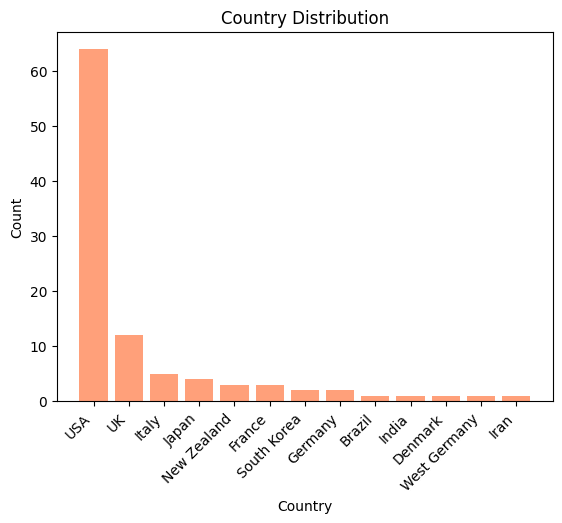

In [119]:
# Count occurrences of each country
country_counts = df['Country'].value_counts()

# label x and y axis
x = country_counts.index
y = country_counts.values

# Plotting the bar chart
plt.bar(x, y, color = "LightSalmon")

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
